In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from sklearn.cluster import KMeans


In [15]:
data=pd.read_csv('C:\\Users\\Sujina\\Downloads\\data_stocks.csv')

In [16]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [17]:
data.set_index('DATE',inplace=True)

In [19]:
#Calculate percentage return and volatilities over the period
returns = data.pct_change().mean() * 109
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = data.pct_change().std() * sqrt(109)

returns.head()

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

Text(0.5,1,'Elbow curve')

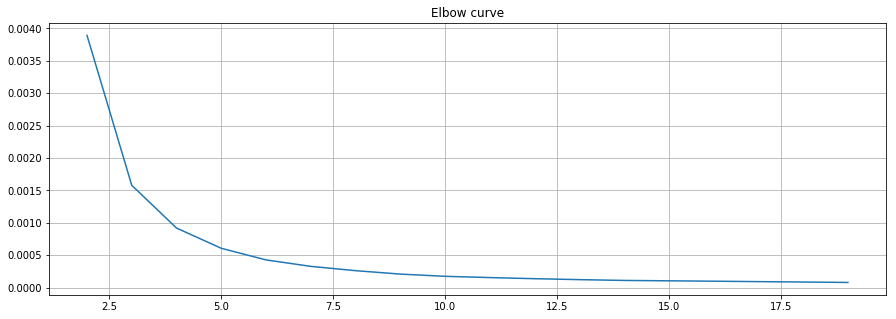

In [20]:
X = returns
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
 
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

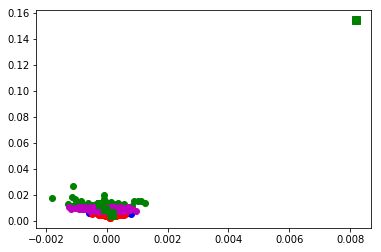

In [21]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)

# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [22]:
#identify the outlier
print(returns.idxmax())

Returns       NYSE.XRX
Volatility    NYSE.XRX
dtype: object


In [23]:
#drop the relevant stock from our data
returns.drop('NYSE.XRX',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

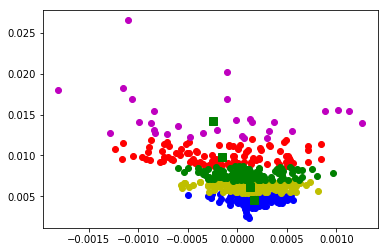

In [24]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [25]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

for detail in details:
    print(detail)

('SP500', 0)
('NASDAQ.AAL', 2)
('NASDAQ.AAPL', 1)
('NASDAQ.ADBE', 1)
('NASDAQ.ADI', 3)
('NASDAQ.ADP', 3)
('NASDAQ.ADSK', 2)
('NASDAQ.AKAM', 2)
('NASDAQ.ALXN', 2)
('NASDAQ.AMAT', 2)
('NASDAQ.AMD', 4)
('NASDAQ.AMGN', 1)
('NASDAQ.AMZN', 3)
('NASDAQ.ATVI', 3)
('NASDAQ.AVGO', 3)
('NASDAQ.BBBY', 2)
('NASDAQ.BIIB', 3)
('NASDAQ.CA', 2)
('NASDAQ.CBOE', 1)
('NASDAQ.CELG', 1)
('NASDAQ.CERN', 1)
('NASDAQ.CHRW', 3)
('NASDAQ.CHTR', 2)
('NASDAQ.CINF', 1)
('NASDAQ.CMCSA', 1)
('NASDAQ.CME', 1)
('NASDAQ.COST', 1)
('NASDAQ.CSCO', 1)
('NASDAQ.CSX', 3)
('NASDAQ.CTAS', 1)
('NASDAQ.CTSH', 0)
('NASDAQ.CTXS', 3)
('NASDAQ.DISCA', 2)
('NASDAQ.DISCK', 2)
('NASDAQ.DISH', 2)
('NASDAQ.DLTR', 2)
('NASDAQ.EA', 2)
('NASDAQ.EBAY', 3)
('NASDAQ.EQIX', 3)
('NASDAQ.ESRX', 2)
('NASDAQ.ETFC', 3)
('NASDAQ.EXPD', 1)
('NASDAQ.EXPE', 3)
('NASDAQ.FAST', 2)
('NASDAQ.FB', 1)
('NASDAQ.FFIV', 2)
('NASDAQ.FISV', 0)
('NASDAQ.FITB', 3)
('NASDAQ.FLIR', 3)
('NASDAQ.FOX', 3)
('NASDAQ.FOXA', 3)
('NASDAQ.GILD', 1)
('NASDAQ.GOOG', 1)
('NASDAQ.